## Isotope data plotting (Soutter et al. 2020)

### Import packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mtick
from matplotlib import colors
import scipy as sp
from scipy import stats
import statistics as st
from sklearn.metrics import r2_score

mpl.rc('font',family='Arial') # set font

%matplotlib inline

### Read and filter data

In [2]:
os.chdir('/Users/euan-soutter/Desktop/Python/Isotopes') # working directory
df = pd.read_csv("samples_minus.csv")
dfs = pd.read_csv("sea.csv") # Miller and Kominz et al sea-level data
dfc = pd.read_csv("cramer.csv") # Cramer et al d13C data
dfr = pd.read_csv("repeats.csv")
dfi = df.filter(items = ['Height_m','d13C','d18O','Position'])
dfi = dfi.dropna()
one = dfi.loc[dfi['Position'] == 1] # fine-grained interval 1
two = dfi.loc[dfi['Position'] == 2] # fine-grained interval 2
three = dfi.loc[dfi['Position'] == 3] # fine-grained interval 3
dfl = pd.read_csv('log.csv')

### Seperated isotope comparisons

Text(0.0, 1.0, 'Sample\nheight\n(m)')

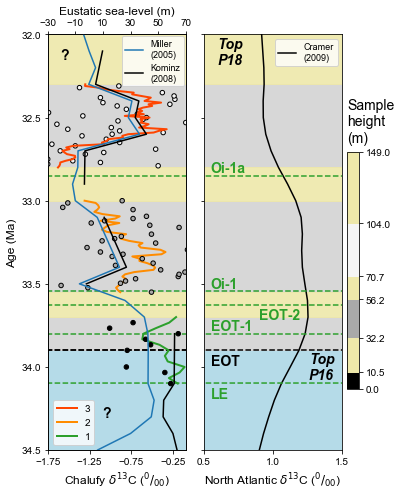

In [3]:
# define moving average function
def movingaverage(y, N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

# define lithology fill function
def fill(ax):
    ax=ax
    ax.fill_between([-50,250], 34.5, 33.9, color='lightblue', alpha=alpha)
    ax.fill_between([-50,250], 33.9, 33.7, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 33.55, 33, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 32.8, 32.3, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 33.7,33.55, color='palegoldenrod', alpha=alpha)
    ax.fill_between([-50,250], 33, 32.8, color='palegoldenrod', alpha=alpha)
    ax.fill_between([-50,250], 32.3, 32.0, color='palegoldenrod', alpha=alpha)

window = 10 # set moving average window
alpha = 0.9 # set fill transparency

# set age windows
age = np.linspace(34.1, 32.2, 106)
age1 =  np.linspace(34.1, 33.7, 13)
age2 =  np.linspace(33.55, 33, 42)
age3 =  np.linspace(32.8, 32.3, 51)

# set-up color map
cmap = mpl.colors.ListedColormap(['k', 'palegoldenrod', 'darkgrey', 
                                  'palegoldenrod', 'whitesmoke', 'palegoldenrod'])
bounds = [0, 10.5, 32.2, 56.21, 70.7, 104, 149]
norm = colors.BoundaryNorm(bounds, cmap.N)

# set-up plot
fig, ax = plt.subplots(figsize=(6, 7), ncols = 2) #(6, 6.5)

# plot Chalufy d13C data
axa = ax[0]
axb = axa.twiny()
axa.plot(movingaverage(one.d13C, 5), age1, color='tab:green',label= '1', lw=2, zorder=4)
axa.plot(movingaverage(two.d13C, window), age2, color='darkorange',label= '2', lw=2, zorder=4)
axa.plot(movingaverage(three.d13C, window), age3, color='orangered',label= '3', lw=2, zorder=4)
cax = axa.scatter(one.d13C, age1, c=one.Height_m, cmap = cmap, 
                  norm=norm, s=20, edgecolor='k', zorder=10)
axa.scatter(two.d13C, age2, c=two.Height_m, cmap = cmap, 
                  norm=norm, s=20, edgecolor='k', zorder=10)
axa.scatter(three.d13C, age3, c=three.Height_m, cmap = cmap,norm=norm, s=20, edgecolor='k', zorder=3)
# ax[0].plot(movingaverage(dfi.d13C, window), age, color='k',label= '10 pt.\navg.', lw=2, zorder=5)
# cax = ax[0].scatter(dfi.d13C, age, c=dfi.Height_m, cmap = cmap, norm=norm, s=20, edgecolor='k', zorder=3)
# axa.set_title('Chalufy $\delta^{13}$C vs eustatic sea-level', fontsize=14)
axa.set_xlim(-1.75, -0.1) #(-1.75,-0.1) (-3,1.3)
# ax[0].set_xlim(-3, 1.3) 
axa.set_xticks(np.arange(-1.75,0.1,0.5)) #(-1.75,0.1,0.5))
axa.set_xlabel('Chalufy $\delta^{13}$C ($^{0}/_{00}$)', fontsize=12)
axa.set_ylabel('Age (Ma)', fontsize=12)
axa.set_ylim(32,35.2)
axa.set_yticks(np.arange(32,35,0.5))
axa.invert_yaxis()
axa.plot([-50, 250], [33.9, 33.9], color='k', linestyle='--', linewidth=1.5)
handles, labels = ax[0].get_legend_handles_labels()
axa.legend(reversed(handles), reversed(labels), loc='lower left')
fill(axa)

# plot sea-level data
axb.plot(dfs.sea_miller, dfs.age_miller, lw=1.5, label='Miller\n(2005)', zorder=2, color='tab:blue')
# sns.lineplot(dfs.sea_best_ketal, dfs.age_ketal, color='k', sort=False, lw=1.5, zorder=1, ax=axb)
axb.plot(dfs.sea_best_ketal, dfs.age_ketal, lw=1.5, label='Kominz\n(2008)', zorder=2, color='k')
axb.set_ylim(32,34.5)
axb.set_xlim(-30, 70)
axb.set_xlabel('Eustatic sea-level (m)', fontsize=12)
axb.set_ylabel('')
axb.set_xticks(np.arange(-30,70.001,20))
axb.legend(fontsize=9, loc=[0.535,0.875])
axb.tick_params(axis='y', labelleft=False)
axb.invert_yaxis() 

# plot Cramer d13C data
ax[1].plot(dfc.nAtlantic_d13Ctrend, dfc.age_gts2004, color='k', label= 'Cramer\n(2009)', lw=1.5,zorder=2)
# ax[1].set_title('North Atlantic $\delta^{13}$C', fontsize=14)
ax[1].set_xlabel('North Atlantic $\delta^{13}$C ($^{0}/_{00}$)', fontsize=12)
ax[1].set_xlim(0.5,1.5)
ax[1].set_xticks(np.arange(0.5,1.5001,0.5))
ax[1].set_ylim(32,34.5)
ax[1].legend(fontsize=9, loc='upper right')
ax[1].tick_params(axis='y', labelleft=False)
ax[1].invert_yaxis()
fill(ax[1])

# plot Chalufy d18O data
# ax[3].plot(movingaverage(one.d18O, window), age1, color='tab:green',label= '1', lw=1.5, zorder=4)
# ax[3].plot(movingaverage(two.d18O, window), age2, color='darkorange',label= '2', lw=1.5, zorder=4)
# ax[3].plot(movingaverage(three.d18O, window), age3, color='orangered',label= '3', lw=1.5, zorder=4)
# ax[3].scatter(one.d18O, age1, c=one.Height_m, cmap = cmap, 
#                   norm=norm, s=20, edgecolor='k', zorder=3)
# ax[3].scatter(two.d18O, age2, c=two.Height_m, cmap = cmap, 
#                   norm=norm, s=20, edgecolor='k', zorder=3)
# ax[3].scatter(three.d18O, age3, c=three.Height_m, cmap = cmap, 
#                   norm=norm, s=20, edgecolor='k', zorder=3)
# # ax[3].plot(movingaverage(dfi.d18O, window), age, color='k', label= '10 pt.\navg.', lw=2, zorder=5)
# # ax[3].scatter(dfi.d18O, age, c=dfi.Height_m, cmap = cmap, norm=norm, s=20, edgecolor='k', zorder=3)
# ax[3].set_title('Chalufy $\delta^{18}$O', fontsize=14)
# ax[3].set_xlim(-8.5,-4.999)
# ax[3].set_xlabel('$\delta^{18}$O ($^{0}/_{00}$)', fontsize=11)
# ax[3].set_xticks(np.arange(-8.5,-4.99,2))
# ax[3].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
# ax[3].set_ylim(32,34.5)
# ax[3].tick_params(axis='y', labelleft=False)
# ax[3].invert_yaxis()
# handles, labels = ax[3].get_legend_handles_labels()
# ax[3].legend(reversed(handles), reversed(labels), loc='lower left')
# fill(ax[3])

# plot Atlantic d18O data
# ax[4].plot(dfc.nAtlantic_d18Otrend, dfc.age_gts2004.values, color='k', label= 'Cramer\n(2009)', lw=1.5,zorder=2)
# ax[4].set_title('North Atlantic $\delta^{18}$O', fontsize=14)
# # ax.set_ylabel('Age (Ma)', fontsize=12)
# ax[4].set_xlabel('$\delta^{18}$O ($^{0}/_{00}$)', fontsize=11)
# ax[4].set_xlim(0.5,2.0001)
# ax[4].set_xticks(np.arange(0.5,2.001,0.5))
# ax[4].set_ylim(32,34.5)
# ax[4].legend(fontsize=9, loc='lower right').set_zorder(5)
# ax[4].invert_yaxis()
# ax[4].tick_params(axis='y', labelleft=False)
# fill(ax[4])

# annotate stratigraphic horizons
ax[0].annotate('?',(-1.6,32.15), fontsize=14,fontweight='bold', color='k')
ax[0].annotate('?',(-1.1,34.3), fontsize=14,fontweight='bold', color='k')
ax[1].annotate('EOT',(0.55,33.99), fontweight='bold', fontsize=14)
ax[1].annotate('Top\nP18',(0.6,32.18), fontsize=14, fontstyle='italic', fontweight='bold', color='k')
ax[1].annotate('Top\nP16',(1.26,34.075), fontsize=14, fontstyle='italic', fontweight='bold',color='k') #(1.7,34)(1.73,34.1)
ax[1].annotate('LE',(0.55,34.19), fontsize=14, fontweight='bold', color='tab:green')
ax[1].annotate('EOT-1',(0.55,33.78), fontsize=14, fontweight='bold',  color='tab:green')
ax[1].annotate('EOT-2',(0.90,33.71), fontsize=14, fontweight='bold', color='tab:green')
ax[1].annotate('Oi-1',(0.55,33.525), fontsize=14,fontweight='bold', color='tab:green')
ax[1].annotate('Oi-1a',(0.55,32.83), fontsize=14,fontweight='bold', color='tab:green')

# plot stratigraphic horizons
for ax in ax:
    ax.plot([-50, 250], [33.9, 33.9], color='k', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [33.8, 33.8], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [33.63, 33.63], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [33.545, 33.545], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [32.85, 32.85], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [34.1, 34.08], color='tab:green', linestyle='--', linewidth=1.5)

plt.tight_layout(w_pad=1)

# plot color bar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.75, 0.22, 0.15, 0.47], aspect=20)
cbar = fig.colorbar(cax, cax=cbar_ax, cmap = cmap, norm = norm, boundaries= bounds, orientation='vertical', 
                    ticks=[0, 10.5, 32.2, 56.2, 70.7, 104, 149], spacing='proportional') 
cbar.ax.set_title('Sample\nheight\n(m)',loc='left', fontsize=14,pad=10)

# save figure
# plt.savefig('iso_split_all.png', dpi=400)


### d13C vs Height

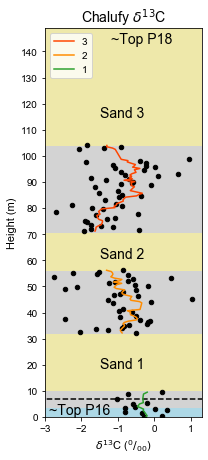

In [4]:
# define moving average function
def movingaverage(y, N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

# define lithology fill function
def fill(ax):
    ax=ax
    ax.fill_between([-10,10], 0, 4, color = 'lightblue')
    ax.fill_between([-10,10], 4, 10.5, color = 'lightgrey')
    ax.fill_between([-10,10], 10.5, 32.2, color = 'palegoldenrod')
    ax.fill_between([-10,10], 32.2, 56.2, color = 'lightgrey')
    ax.fill_between([-10,10], 56.2, 70.7, color = 'palegoldenrod')
    ax.fill_between([-10,10], 70.7, 104, color = 'lightgrey')
    ax.fill_between([-10,10], 104, 149, color = 'palegoldenrod')

# set moving average window   
window = 10
# set fill transparency
alpha=0.9

# set-up figure
fig, ax = plt.subplots(figsize=(3,6.5)) #(2.5,7)

# plot Chalufy d13C data
ax.plot(movingaverage(one.d13C, window), one.Height_m, color='tab:green',label= '1', lw=1.5, zorder=4)
ax.plot(movingaverage(two.d13C, window), two.Height_m, color='darkorange',label= '2', lw=1.5, zorder=4)
ax.plot(movingaverage(three.d13C, window), three.Height_m, color='orangered',label= '3', lw=1.5, zorder=4)
cax = ax.scatter(one.d13C, one.Height_m, color='k', s=20, edgecolor='k', zorder=3)
ax.scatter(two.d13C, two.Height_m, s=20, color='k', edgecolor='k', zorder=3)
ax.scatter(three.d13C, three.Height_m, color='k', s=20, edgecolor='k', zorder=3)
ax.set_title('Chalufy $\delta^{13}$C', fontsize=14)
ax.set_xlim(-3, 1.3)
ax.set_xticks(np.arange(-3,1.3,1))
ax.set_xlabel('$\delta^{13}$C ($^{0}/_{00}$)', fontsize=11)
ax.set_ylabel('Height (m)', fontsize=11)
ax.set_ylim(0,149)
ax.set_yticks(np.arange(0,149,10))
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')
fill(ax)

# annotate statigraphic information
ax.annotate('~Top P18',(-1.19,143), fontsize=14, color='k')
ax.annotate('~Top P16',(-2.9,1), fontsize=14, color='k') #(1.7,34)(1.73,34.1)
ax.annotate('Sand 3', (-1.5,115), fontsize =14)
ax.annotate('Sand 2', (-1.5,61), fontsize =14)
ax.annotate('Sand 1', (-1.5,18.8), fontsize =14)
# ax.annotate('Mud 3', (1.9,84), fontsize =14)
# ax.annotate('Mud 2', (1.9,41.8), fontsize =14)
# ax.annotate('Mud 1', (1.9, 2.5), fontsize =14)

# plot statigraphic information
ax.plot([-50, 250], [7, 7], color='k', linestyle='--', linewidth=1.5)

plt.tight_layout()

# save figure
# plt.savefig('new_iso_height.png',dpi=400)


### d13C vs sea-level correlation

{'polynomial': [0.1673321560366188, -20.67784734599464, 851.3834274384986, -11680.264557219474], 'determination': 0.3088707468134416}
{'polynomial': [-3.555955055414656e-05, 0.0010829242560502852, 0.017253275068466568, -1.0788675890245958], 'determination': 0.6256242610791916}
{'polynomial': [-1.6590993597413786e-05, 0.0005449306475146428, 0.024563555032268362, -1.387116434694637], 'determination': 0.9081914432338795}


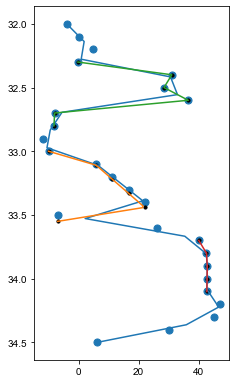

In [6]:
from scipy.interpolate import interp1d

# define age windows
age = np.linspace(32, 34.5, 19)
age1 =  np.linspace(34.1, 33.7, 13)
age2 =  np.linspace(33.55, 33, 42)
age3 =  np.linspace(32.8, 32.3, 51)

# moving average windows
window = 10

# filter sea-level age intervals
sea = dfs[dfs.age_miller.between(32, 34.5)]
sea1 = dfs[dfs.age_miller.between(33.7, 34.1)]
sea2 = dfs[dfs.age_miller.between(33, 33.55)]
sea3 = dfs[dfs.age_miller.between(32.3, 32.8)]

# interpolation ranges
x = np.linspace(32, 34.5, len(sea))
x1 = np.linspace(33.7, 34.1, len(sea1))
x2 = np.linspace(33, 33.55, len(sea2))
x3 = np.linspace(32.3, 32.8, len(sea3))

# interpolation
kind='linear'
f = interp1d(x, sea.sea_miller, kind=kind)
f1 = interp1d(x1, sea1.sea_miller, kind=kind)
f2 = interp1d(x2, sea2.sea_miller, kind=kind)
f3 = interp1d(x3, sea3.sea_miller, kind=kind)

# define polynomial regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

# calculate polynomial r2
pf1 = polyfit(f1(age1), (movingaverage(one.d13C, 5)), 3)
pf2 = polyfit(f2(age2), (movingaverage(two.d13C, window)), 3)
pf3 = polyfit(f3(age3), (movingaverage(three.d13C, window)), 3)

# print polynomial r2
print(pf1)
print(pf2)
print(pf3)

# check data
plt.subplots(figsize=(3.5,6.5))

plt.scatter(sea.sea_miller, x, color='tab:blue', s=50)
plt.plot(f(age), age, '-', color='tab:blue')

plt.scatter(sea1.sea_miller, x1, color='k', s=10)
plt.plot(f1(age1), age1, '-', color='tab:red')

plt.scatter(sea2.sea_miller, x2, color='k', s=10)
plt.plot(f2(age2), age2, '-', color='tab:orange')

plt.scatter(sea3.sea_miller, x3, color='k', s=10)
plt.plot(f3(age3), age3, '-', color='tab:green')

ax = plt.gca()
ax.invert_yaxis()



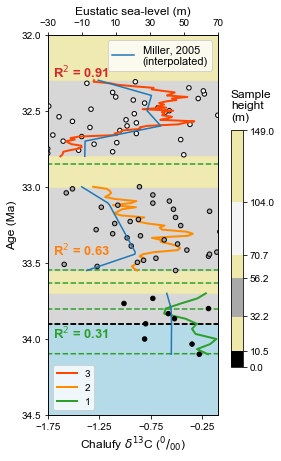

In [12]:
# define moving average function
def movingaverage(y, N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

# define lithology fill function
def fill(ax):
    ax=ax
    ax.fill_between([-50,250], 34.5, 33.9, color='lightblue', alpha=alpha)
    ax.fill_between([-50,250], 33.9, 33.7, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 33.55, 33, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 32.8, 32.3, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 33.7,33.55, color='palegoldenrod', alpha=alpha)
    ax.fill_between([-50,250], 33, 32.8, color='palegoldenrod', alpha=alpha)
    ax.fill_between([-50,250], 32.3, 32.0, color='palegoldenrod', alpha=alpha)

window = 10 # set moving average window
alpha = 0.9 # set fill transparency

# set age windows
age = np.linspace(34.1, 32.2, 106)
age1 =  np.linspace(34.1, 33.7, 13)
age2 =  np.linspace(33.55, 33, 42)
age3 =  np.linspace(32.8, 32.3, 51)

# set-up color map
cmap = mpl.colors.ListedColormap(['k', 'palegoldenrod', 'darkgrey', 
                                  'palegoldenrod', 'whitesmoke', 'palegoldenrod'])
bounds = [0, 10.5, 32.2, 56.21, 70.7, 104, 149]
norm = colors.BoundaryNorm(bounds, cmap.N)

# set-up plot
fig, ax = plt.subplots(figsize=(3.5, 7)) #(6, 6.5)

# plot Chalufy d13C data
axa = ax
axb = axa.twiny()
axa.plot(movingaverage(one.d13C, 5), age1, color='tab:green',label= '1', lw=2, zorder=4)
axa.plot(movingaverage(two.d13C, window), age2, color='darkorange',label= '2', lw=2, zorder=4)
axa.plot(movingaverage(three.d13C, window), age3, color='orangered',label= '3', lw=2, zorder=4)
cax = axa.scatter(one.d13C, age1, c=one.Height_m, cmap = cmap, 
                  norm=norm, s=20, edgecolor='k', zorder=10)
axa.scatter(two.d13C, age2, c=two.Height_m, cmap = cmap, 
                  norm=norm, s=20, edgecolor='k', zorder=10)
axa.scatter(three.d13C, age3, c=three.Height_m, cmap = cmap,norm=norm, s=20, edgecolor='k', zorder=3)
axa.set_xlim(-1.75, -0.1) 
axa.set_xticks(np.arange(-1.75,0.1,0.5))
axa.set_xlabel('Chalufy $\delta^{13}$C ($^{0}/_{00}$)', fontsize=12)
axa.set_ylabel('Age (Ma)', fontsize=12)
axa.set_ylim(32,35.2)
axa.set_yticks(np.arange(32,35,0.5))
axa.invert_yaxis()
axa.plot([-50, 250], [33.9, 33.9], color='k', linestyle='--', linewidth=1.5)
handles, labels = axa.get_legend_handles_labels()
axa.legend(reversed(handles), reversed(labels), loc='lower left')
fill(axa)

# plot sea-level data
# axb.plot(dfs.sea_miller, dfs.age_miller, lw=1.5, label='Miller\n(2005)', zorder=2, color='tab:blue')
# # sns.lineplot(dfs.sea_best_ketal, dfs.age_ketal, color='k', sort=False, lw=1.5, zorder=1, ax=axb)
# axb.plot(dfs.sea_best_ketal, dfs.age_ketal, lw=1.5, label='Kominz\n(2008)', zorder=2, color='k')
axb.plot(f1(age1), age1, color='tab:blue', lw=1.5)
axb.plot(f2(age2), age2, color='tab:blue', lw=1.5)
axb.plot(f3(age3), age3, color='tab:blue', lw=1.5)
# axb.scatter(sea1.sea_miller, x1, color='k', s=10)
# axb.scatter(sea2.sea_miller, x2, color='k', s=10)
# axb.scatter(sea3.sea_miller, x3, color='k', s=10)
axb.set_ylim(32,34.5)
axb.set_xlim(-30, 70)
axb.set_xlabel('Eustatic sea-level (m)', fontsize=12)
axb.set_ylabel('')
axb.set_xticks(np.arange(-30,70.001,20))
axb.legend(['Miller, 2005\n(interpolated)'], fontsize=11, loc='upper right')
axb.tick_params(axis='y', labelleft=False)
axb.invert_yaxis() 

# plot stratigraphic horizons
ax.plot([-50, 250], [33.9, 33.9], color='k', linestyle='--', linewidth=1.5)
ax.plot([-50, 250], [33.8, 33.8], color='tab:green', linestyle='--', linewidth=1.5)
ax.plot([-50, 250], [33.63, 33.63], color='tab:green', linestyle='--', linewidth=1.5)
ax.plot([-50, 250], [33.545, 33.545], color='tab:green', linestyle='--', linewidth=1.5)
ax.plot([-50, 250], [32.85, 32.85], color='tab:green', linestyle='--', linewidth=1.5)
ax.plot([-50, 250], [34.1, 34.08], color='tab:green', linestyle='--', linewidth=1.5)

# plot R2
ax.annotate('R$^2$ = %s' % (pf3['determination']).round(2), 
                           (-1.7, 32.28), color='tab:red', fontsize=13, fontweight='bold')
ax.annotate('R$^2$ = %s' % (pf2['determination']).round(2), 
               (-1.7, 33.45), color='tab:orange', fontsize=13, fontweight='bold')
ax.annotate('R$^2$ = %s' % (pf1['determination']).round(2), 
               (-1.7, 34), color='tab:green', fontsize=13, fontweight='bold')

# plot color bar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.8, 0.22, 0.15, 0.47], aspect=20)
cbar = fig.colorbar(cax, cax=cbar_ax, cmap = cmap, norm = norm, boundaries= bounds, orientation='vertical', 
                    ticks=[0, 10.5, 32.2, 56.2, 70.7, 104, 149], spacing='proportional') 
cbar.ax.set_title('Sample\nheight\n(m)',loc='left', fontsize=12,pad=10)

# save figure

plt.savefig('iso_corr.png', dpi=400, bbox_inches='tight')


### Moving average comparison 1

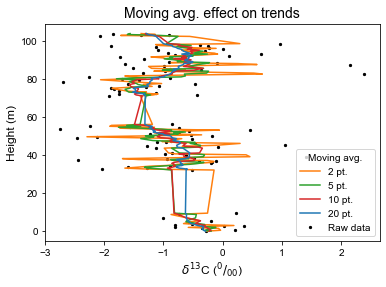

In [64]:
# plot d13C vs height
plt.scatter(dfi.d13C, dfi.Height_m, color='k', s=5, label='Raw data')

# plot d13C moving averages
plt.plot(movingaverage(dfi.d13C, 2), dfi.Height_m, color='tab:orange', label='2 pt.')
plt.plot(movingaverage(dfi.d13C, 5), dfi.Height_m, color='tab:green', label='5 pt.')
plt.plot(movingaverage(dfi.d13C, 10), dfi.Height_m, color='tab:red', label='10 pt.')
plt.plot(movingaverage(dfi.d13C, 20), dfi.Height_m, color='tab:blue', label='20 pt.')
plt.legend(title='Moving avg.')
plt.title('Moving avg. effect on trends',fontsize=14)
plt.ylabel('Height (m)', fontsize=12)
plt.xlabel(('$\delta^{13}$C ($^{0}/_{00}$)'), fontsize=12)

# save fig
plt.savefig('iso_moving_avg.png', dpi=400)

### Moving average comparison 2

Text(0, 0.5, '(m)')

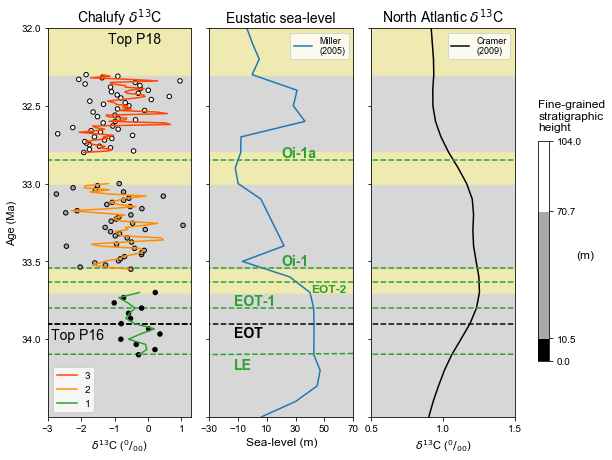

In [15]:
# define moving average function
def movingaverage(y, N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

# define lithology fill function
def fill(ax):
    ax=ax
    ax.fill_between([-50,250], 34.5, 33.7, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 33.55, 33, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 32.8, 32.3, color='lightgrey', alpha=alpha)
    ax.fill_between([-50,250], 33.7,33.55, color='palegoldenrod', alpha=alpha)
    ax.fill_between([-50,250], 33, 32.8, color='palegoldenrod', alpha=alpha)
    ax.fill_between([-50,250], 32.3, 32.0, color='palegoldenrod', alpha=alpha)

# moving average window
window = 2

# fill transparency
alpha=0.9

# age windows
age = np.linspace(34.1, 32.2, 106)
age1 =  np.linspace(34.1, 33.7, 13)
age2 =  np.linspace(33.55, 33, 42)
age3 =  np.linspace(32.8, 32.3, 51)

# color bar
cmap = mpl.colors.ListedColormap(["k", "darkgrey", "w"])
bounds=[0,10.5,70.7,104]
norm = colors.BoundaryNorm(bounds, cmap.N)

# set-up plot
fig, ax = plt.subplots(figsize=(9, 6.5), ncols=3) #(6, 6.5)

# plot Chalufy d13C
ax[0].plot(movingaverage(one.d13C, window), age1, color='tab:green',label= '1', lw=1.5, zorder=4)
ax[0].plot(movingaverage(two.d13C, window), age2, color='darkorange',label= '2', lw=1.5, zorder=4)
ax[0].plot(movingaverage(three.d13C, window), age3, color='orangered',label= '3', lw=1.5, zorder=4)
cax = ax[0].scatter(one.d13C, age1, c=one.Height_m, cmap = cmap, 
                  norm=norm, s=20, edgecolor='k', zorder=3)
ax[0].scatter(two.d13C, age2, c=two.Height_m, cmap = cmap, 
                  norm=norm, s=20, edgecolor='k', zorder=3)
ax[0].scatter(three.d13C, age3, c=three.Height_m, cmap = cmap,norm=norm, s=20, edgecolor='k', zorder=3)
ax[0].set_title('Chalufy $\delta^{13}$C', fontsize=14)
# ax[0].set_xlim(-1.75, -0.1) #(-1.75,-0.1) (-3,1.3)
ax[0].set_xlim(-3, 1.3) 
ax[0].set_xticks(np.arange(-3,1.5,1)) #(-1.75,0.1,0.5))
ax[0].set_xlabel('$\delta^{13}$C ($^{0}/_{00}$)', fontsize=11)
ax[0].set_ylabel('Age (Ma)', fontsize=11)
ax[0].set_ylim(32,34.5)
ax[0].set_yticks(np.arange(32,34.5,0.5))
ax[0].invert_yaxis()
ax[0].plot([-50, 250], [33.9, 33.9], color='k', linestyle='--', linewidth=1.5)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(reversed(handles), reversed(labels), loc='lower left')
fill(ax[0])

# plot sea-level
ax[1].plot(dfs.sea_miller, dfs.age_miller, lw=1.5, label='Miller\n(2005)', color='tab:blue')
ax[1].set_ylim(32,34.5)
ax[1].set_xlim(-30, 70)
ax[1].set_xlabel('Sea-level (m)', fontsize=12)
ax[1].set_ylabel('')
ax[1].set_xticks(np.arange(-30,70.001,20))
ax[1].set_title('Eustatic sea-level', fontsize=14)
ax[1].legend(fontsize=9, loc='upper right')
ax[1].tick_params(axis='y', labelleft=False)
ax[1].invert_yaxis() 
fill(ax[1])

# plot Atlantic d13C
ax[2].plot(dfc.nAtlantic_d13Ctrend, dfc.age_gts2004, color='k', label= 'Cramer\n(2009)', lw=1.5,zorder=2)
ax[2].set_title('North Atlantic $\delta^{13}$C', fontsize=14)
ax[2].set_xlabel('$\delta^{13}$C ($^{0}/_{00}$)', fontsize=11)
ax[2].set_xlim(0.5,1.5)
ax[2].set_xticks(np.arange(0.5,1.5001,0.5))
ax[2].set_ylim(32,34.5)
ax[2].legend(fontsize=9, loc='upper right')
ax[2].tick_params(axis='y', labelleft=False)
ax[2].invert_yaxis()
fill(ax[2])

# annotate stratigraphic data
ax[0].annotate('Top P18',(-1.19,32.1), fontsize=14, color='k')
ax[0].annotate('Top P16',(-2.9,34), fontsize=14, color='k') #(1.7,34)(1.73,34.1)
ax[1].annotate('LE',(-13,34.19), fontsize=14, fontweight='bold', color='tab:green')
ax[1].annotate('EOT',(-13,33.99), fontweight='bold', fontsize=14)
ax[1].annotate('EOT-1',(-13,33.78), fontsize=14, fontweight='bold',  color='tab:green')
ax[1].annotate('EOT-2',(41,33.70), fontsize=12, fontweight='bold', color='tab:green')
ax[1].annotate('Oi-1',(20,33.525), fontsize=14,fontweight='bold', color='tab:green')
ax[1].annotate('Oi-1a',(20,32.83), fontsize=14,fontweight='bold', color='tab:green')

# plot stratigraphic data
for ax in ax:
    ax.plot([-50, 250], [34.1, 34.08], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [33.9, 33.9], color='k', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [33.8, 33.8], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [33.63, 33.63], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [33.545, 33.545], color='tab:green', linestyle='--', linewidth=1.5)
    ax.plot([-50, 250], [32.85, 32.85], color='tab:green', linestyle='--', linewidth=1.5)

plt.tight_layout(w_pad=1)

# plot colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.77, 0.22, 0.15, 0.47], aspect=20)
cbar = fig.colorbar(cax, cax=cbar_ax, cmap = cmap, norm = norm, boundaries= bounds, orientation='vertical', 
                    ticks=[0,10.5,70.7,104], spacing='proportional') 
cbar.ax.set_title('Fine-grained\nstratigraphic\nheight',loc='left', fontsize=12,pad=10)
cbar.ax.set_ylabel('(m)',fontsize=12, rotation=0)

# save figure
# plt.savefig('iso_split_avg_2.png',dpi=400)


0.8920621143245114
0.44583974354366046
0.8514904947900299
0.9777593833682732
1.8713314443633635


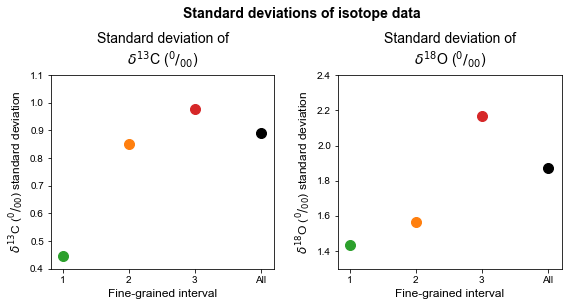

In [66]:
# calculate and print standard deviations of data
print(st.stdev(dfi.d13C))
print(st.stdev(one.d13C))
print(st.stdev(two.d13C))
print(st.stdev(three.d13C))
print(st.stdev(dfi.d18O))

# set-up plot
fig, ax = plt.subplots(figsize=(8,4), ncols=2)

# plot d13C standard-deviations
ax[0].scatter(1,(st.stdev(one.d13C)),color='tab:green', s=100)
ax[0].scatter(2,(st.stdev(two.d13C)), color='tab:orange', s=100)
ax[0].scatter(3,(st.stdev(three.d13C)), color='tab:red', s=100)
ax[0].scatter(4,(st.stdev(dfi.d13C)), color='k', s=100)
ax[0].set_xticks(np.arange(1,5,1))
ax[0].set_ylim(0.4,1.1)
ax[0].set_xticklabels(['1','2','3','All'])
ax[0].set_ylabel('$\delta^{13}$C ($^{0}/_{00}$) standard deviation', fontsize=12)
ax[0].set_xlabel('Fine-grained interval', fontsize=12)
ax[0].set_title('Standard deviation of\n$\delta^{13}$C ($^{0}/_{00}$)', fontsize=14, pad=10)

# plot d18O standard-deviations
ax[1].scatter(1,(st.stdev(one.d18O)),color='tab:green', s=100)
ax[1].scatter(2,(st.stdev(two.d18O)), color='tab:orange', s=100)
ax[1].scatter(3,(st.stdev(three.d18O)), color='tab:red', s=100)
ax[1].scatter(4,(st.stdev(dfi.d18O)), color='k', s=100)
ax[1].set_xticks(np.arange(1,5,1))
ax[1].set_ylim(1.3,2.4)
ax[1].set_xticklabels(['1','2','3','All'])
ax[1].set_ylabel('$\delta^{18}$O ($^{0}/_{00}$) standard deviation', fontsize=12)
ax[1].set_xlabel('Fine-grained interval', fontsize=12)
ax[1].set_title('Standard deviation of\n$\delta^{18}$O ($^{0}/_{00}$)', fontsize=14, pad=10)

plt.tight_layout(w_pad=2)
plt.suptitle('Standard deviations of isotope data', fontsize=14, fontweight='bold', x = 0.53, y = 1.05)

# save figure
plt.savefig('iso_stdev.png', dpi=400)

0.8920621143245114
0.44583974354366046
0.8514904947900299
0.9777593833682732
1.8713314443633635


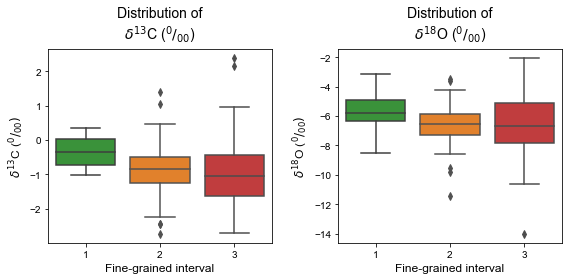

In [67]:
# calculate and print standard deviations of data
print(st.stdev(dfi.d13C))
print(st.stdev(one.d13C))
print(st.stdev(two.d13C))
print(st.stdev(three.d13C))
print(st.stdev(dfi.d18O))

# set-up figure
fig, ax = plt.subplots(figsize=(8,4), ncols=2)

# plot d13C boxplots
sns.boxplot(dfi.Position, one.d13C, color='tab:green', ax=ax[0])
sns.boxplot(dfi.Position, two.d13C, color='tab:orange', ax=ax[0])
sns.boxplot(dfi.Position, three.d13C, color='tab:red', ax=ax[0])
ax[0].set_xticklabels(['1','2','3'])
ax[0].set_ylabel('$\delta^{13}$C ($^{0}/_{00})$', fontsize=12)
ax[0].set_xlabel('Fine-grained interval', fontsize=12)
ax[0].set_title('Distribution of\n$\delta^{13}$C ($^{0}/_{00}$)', fontsize=14, pad=10)

# plot d18O boxplots
sns.boxplot(dfi.Position, one.d18O, color='tab:green', ax=ax[1])
sns.boxplot(dfi.Position, two.d18O, color='tab:orange', ax=ax[1])
sns.boxplot(dfi.Position, three.d18O, color='tab:red', ax=ax[1])
ax[1].set_xticklabels(['1','2','3'])
ax[1].set_ylabel('$\delta^{18}$O ($^{0}/_{00})$', fontsize=12)
ax[1].set_xlabel('Fine-grained interval', fontsize=12)
ax[1].set_title('Distribution of\n$\delta^{18}$O ($^{0}/_{00}$)', fontsize=14, pad=10)

plt.tight_layout(w_pad=2)

# save figure
# plt.savefig('iso_box.png', dpi=400)

### Repeats and residuals

Text(0.02, -1.85, 'r$^2$ = 0.45')

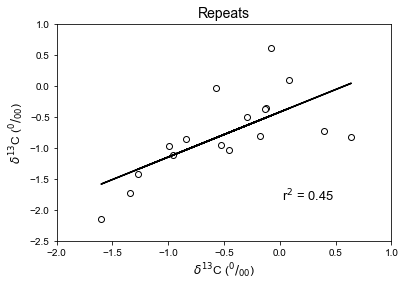

In [68]:
# plot repeats
plt.scatter(dfr.d13C_1, dfr.d13C_2, color='w', edgecolor='k')

# plot linear regressions of repeats
z = np.polyfit(dfr.d13C_1, dfr.d13C_2, 1)
p = np.poly1d(z)
plt.plot(dfr.d13C_1,p(dfr.d13C_1),"k")
plt.xlim(-2.0,1)
plt.ylim(-2.5,1)
plt.xlabel('$\delta^{13}$C ($^{0}/_{00}$)', fontsize=12)
plt.ylabel('$\delta^{13}$C ($^{0}/_{00}$)', fontsize=12)
plt.title('Repeats', fontsize=14)

# calculate and plot r2 of repeats
r2 = r2_score(dfr.d13C_2, p(dfr.d13C_1))
r2 = round(r2, 2)
plt.annotate('r$^2$ = %s' % (r2), (0.02,-1.85), fontsize=13)

# plt.savefig('iso_repeats.png', dpi=400)


Text(0.5, 1.0, 'Residuals of repeats')

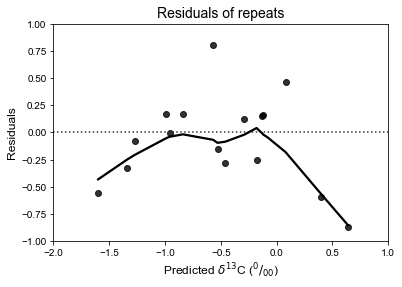

In [69]:
# plot residuals of repeats
sns.residplot(dfr.d13C_1, dfr.d13C_2, lowess=True, color="k")

# plot trendline through residuals
z = np.polyfit(dfr.d13C_1, dfr.d13C_2, 1)
p = np.poly1d(z)
plt.xlim(-2.0,1)
plt.ylim(-1,1)
plt.xlabel('Predicted $\delta^{13}$C ($^{0}/_{00}$)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals of repeats', fontsize=14)
# plt.savefig('iso_residuals.png', dpi=400)

In [4]:
df_int = dfc[dfc.age_gts2004.between(32.3,34.1)]
x = df_int.nAtlantic_d13Ctrend.mean()
y = dfi.d13C.mean()

### Diagenesis

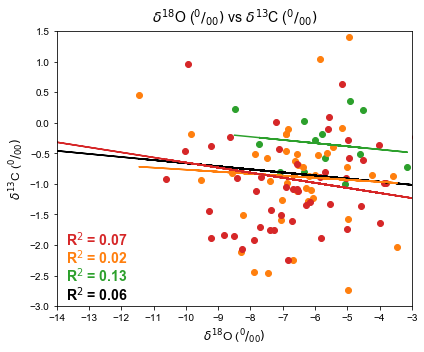

In [71]:
# plot linear regression
def trend(x, y, color, ax):
    ax=ax
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x,p(x),color, lw=1.5)

# calculate linear regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

# calculate and assign linear regressions
pf = polyfit(dfi.d18O, (movingaverage(dfi.d13C, window)), 1)
pf1 = polyfit(one.d18O, (movingaverage(one.d13C, window)), 1)
pf2 = polyfit(two.d18O, (movingaverage(two.d13C, window)), 1)
pf3 = polyfit(three.d18O, (movingaverage(three.d13C, window)), 1)
  
# set-up plot
fig, ax =  plt.subplots(figsize=(6,5))

# plot linear regressions and isotope data
trend(dfi.d18O, dfi.d13C, 'k', ax)
trend(one.d18O, one.d13C, 'tab:green', ax)
trend(two.d18O, two.d13C, 'tab:orange', ax)
trend(three.d18O, three.d13C, 'tab:red', ax)

ax.scatter(one.d18O, one.d13C, color='tab:green')
ax.scatter(two.d18O, two.d13C, color='tab:orange')
ax.scatter(three.d18O, three.d13C, color='tab:red')

# annotate r2 values
ax.annotate('R$^2$ = %s' % (pf['determination']).round(2), 
               (-13.7, -2.9), color='k', fontsize=14, fontweight='bold')
ax.annotate('R$^2$ = %s' % (pf1['determination']).round(2), 
               (-13.7, -2.6), color='tab:green', fontsize=14, fontweight='bold')
ax.annotate('R$^2$ = %s' % (pf2['determination']).round(2), 
               (-13.7, -2.3), color='tab:orange', fontsize=14, fontweight='bold')
ax.annotate('R$^2$ = %s' % (pf3['determination']).round(2), 
               (-13.7, -2), color='tab:red', fontsize=14, fontweight='bold')

ax.set_ylim(-3, 1.5)
ax.set_xlim(-14, -3)
ax.set_xticks(np.arange(-14,-2.99, 1))
ax.set_ylabel('$\delta^{13}$C ($^{0}/_{00})$', fontsize=12)
ax.set_xlabel('$\delta^{18}$O ($^{0}/_{00})$', fontsize=12)
ax.set_title('$\delta^{18}$O ($^{0}/_{00})$ vs $\delta^{13}$C ($^{0}/_{00})$', fontsize=14, pad=9)

plt.tight_layout()

# save figure
# plt.savefig('iso_crossplot.png', dpi=400)